# K Means Clustering from Scratch

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

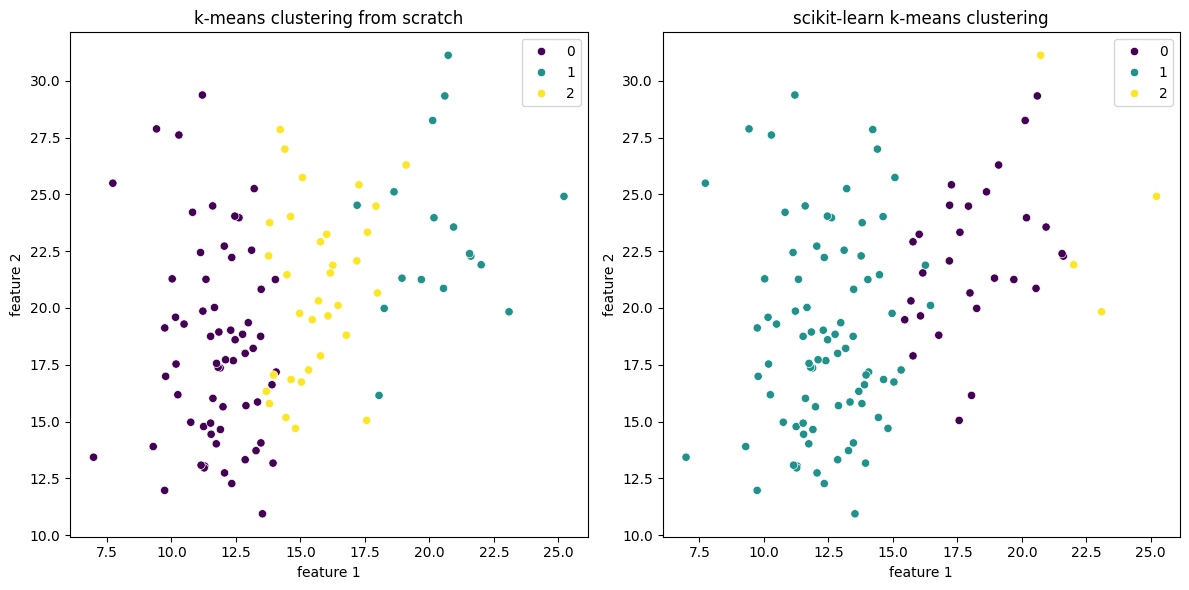

purity (k-means from scratch): 1.75%
purity (scikit-learn k-means): 86.84%


In [1]:
# 1. k-means clustering from scratch
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, X):
        # initialize centroids randomly
        random_indices = np.random.choice(len(X), size=self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # assign clusters based on closest centroid
            clusters = self._assign_clusters(X)
            # update centroids based on mean of points in each cluster
            new_centroids = self._update_centroids(X, clusters)

            # check for convergence (if centroids don't change)
            if np.all(np.abs(new_centroids - self.centroids) <= self.tolerance):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        # compute distances from each point to each centroid
        distances = np.array([[self._euclidean_distance(x, centroid) for centroid in self.centroids] for x in X])
        # assign each point to the closest centroid
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, clusters):
        # compute new centroids as the mean of points in each cluster
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.k)])
        return new_centroids

    def _euclidean_distance(self, x1, x2):
        # calculate euclidean distance between two points
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        # predict cluster labels for the input samples
        return self._assign_clusters(X)

# 2. load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. train k-means clustering from scratch
kmeans_scratch = KMeansScratch(k=3)  # you can adjust k as needed
kmeans_scratch.fit(X_train)
y_pred_scratch_kmeans = kmeans_scratch.predict(X_test)

# 4. train k-means clustering using scikit-learn
kmeans_sklearn = KMeans(n_clusters=3)
kmeans_sklearn.fit(X_train)
y_pred_sklearn_kmeans = kmeans_sklearn.predict(X_test)

# 5. plot the results of k-means clustering from scratch and sklearn
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# k-means from scratch clustering results
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_scratch_kmeans, palette='viridis', ax=axs[0])
axs[0].set_title('k-means clustering from scratch')
axs[0].set_xlabel('feature 1')
axs[0].set_ylabel('feature 2')

# scikit-learn k-means clustering results
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_sklearn_kmeans, palette='viridis', ax=axs[1])
axs[1].set_title('scikit-learn k-means clustering')
axs[1].set_xlabel('feature 1')
axs[1].set_ylabel('feature 2')

plt.tight_layout()
plt.show()

# 6. compare clustering results
# compute the purity (accuracy) based on majority voting for each cluster
purity_scratch = np.mean(y_pred_scratch_kmeans == y_test)
purity_sklearn = np.mean(y_pred_sklearn_kmeans == y_test)

print(f"purity (k-means from scratch): {purity_scratch * 100:.2f}%")
print(f"purity (scikit-learn k-means): {purity_sklearn * 100:.2f}%")
